In [1]:
import os
import pandas as pd
import random
import shutil

data_path = r'C:\Users\chloe\OneDrive\Desktop\swallow EMG\data\participants\chloe\extracted signals'

In [2]:
os.chdir("..") 
from src import feature_extraction, models, utils, results

exclude = ['oral prep 0']
df, class_map = feature_extraction.make_df(data_path, exclude)

df

substance volume         1                                                \
                           min       max        mav        rms    wavelength   
0           0     10  -89.8215   73.5244  10.123081  15.526914   8511.370464   
1           0     10 -113.9200   86.1073   9.896790  16.791919   8262.519721   
2           0     10  -82.3953   84.7438  10.532140  16.572327   8938.223938   
3           0     10 -194.0030  125.6940  11.846242  20.842131   9634.231501   
4           0     10 -117.7260   84.5021  11.854229  18.994828   9543.440074   
..        ...    ...       ...       ...        ...        ...           ...   
440        10     20  -69.3289   69.5755  10.175371  15.426147   8874.451929   
441        10     20  -86.3076   74.0248  11.288252  18.020237   9792.563997   
442        10     20  -93.5527   91.9620  11.081596  17.163182   8838.968969   
443        10     20  -95.3684   61.4933  11.031382  16.758005   9634.328738   
444        10     20  -95.7571   91.9919  13.782139  20.737838  11234.928474   

                                            ...           22             \
          zcr         var abs_diffs_signal  ...          rms wavelength   
0    0.271271  241.085047      8511.370464  ...  4634.416598     426580   
1    0.290290  281.968302      8262.519721  ...  4996.715521     449540   
2    0.274274  274.641479      8938.223938  ...  5597.687773     391580   
3    0.250250  434.394440      9634.231501  ...  6691.171078     458780   
4    0.257257  360.801618      9543.440074  ...  6675.993619     353780   
..        ...         ...              ...  ...          ...        ...   
440  0.279279  237.965865      8874.451929  ...  4313.488379     329560   
441  0.273273  324.728936      9792.563997  ...  5367.578821     396620   
442  0.254254  294.572930      8838.968969  ...  5302.465577     390740   
443  0.288288  280.830702      9634.328738  ...  5118.934928     390040   
444  0.265265  430.057924     11234.928474  ...  4801.379552     462560   

                                                                              \
          zcr           var abs_diffs_signal mean_freq median_freq peak_freq   
0    0.067067  2.147730e+07           426580  6.866916         4.0       2.5   
1    0.040040  2.476357e+07           449540  5.226880         1.5       1.5   
2    0.036036  3.078873e+07           391580  3.448059         1.0       0.5   
3    0.031031  4.119861e+07           458780  4.439223         1.0       0.5   
4    0.026026  4.449073e+07           353780  2.640694         1.0       0.5   
..        ...           ...              ...       ...         ...       ...   
440  0.043043  1.854732e+07           329560  6.230145         3.5       2.5   
441  0.036036  2.879051e+07           396620  5.266034         2.5       2.0   
442  0.035035  2.811149e+07           390740  4.882148         3.0       2.5   
443  0.047047  2.616131e+07           390040  5.639875         3.5       2.5   
444  0.058058  2.290177e+07           462560  6.510082         4.0       2.5   

                              
    shannon_entropy     iemg  
0          4.040291  3322060  
1          4.537548  4038860  
2          4.487950  4577860  
3          4.410476  5437880  
4          4.641191  5531540  
..              ...      ...  
440        3.997013  3136980  
441        4.062512  3865400  
442        4.641988  4293940  
443        4.344892  3813460  
444        4.518855  3783080  

[445 rows x 288 columns]

In [3]:
print(class_map)

{'apple': 0, 'carrot': 1, 'chewing': 2, 'dry swallow': 3, 'grape': 4, 'jelly': 5, 'milk': 6, 'popcorn': 7, 'redu oral prep': 8, 'water': 9, 'yogurt': 10}


C:\Users\chloe\AppData\Local\Temp\ipykernel_8584\4059724031.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x = df.drop(columns=['volume', 'substance'])


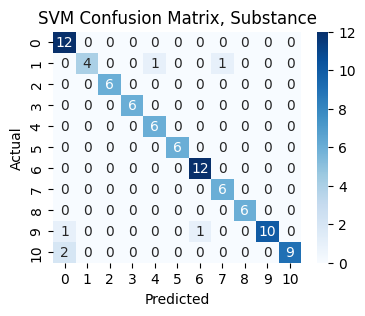

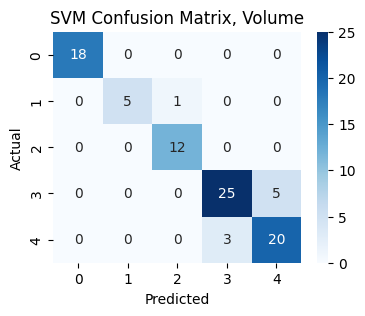

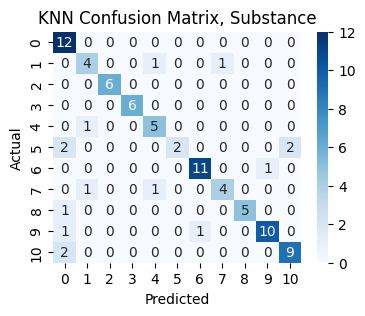

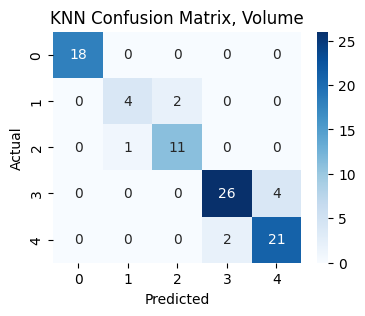

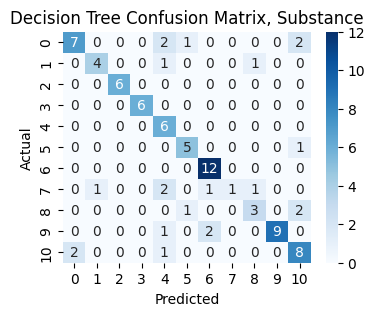

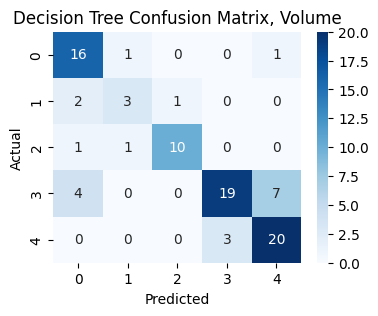

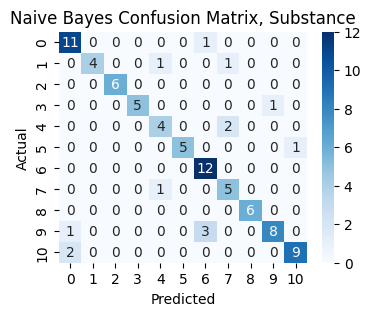

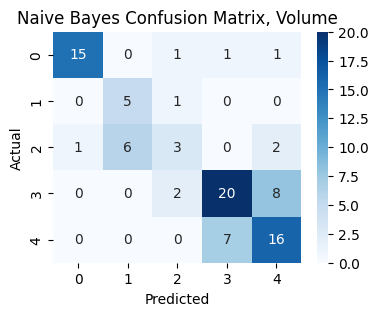

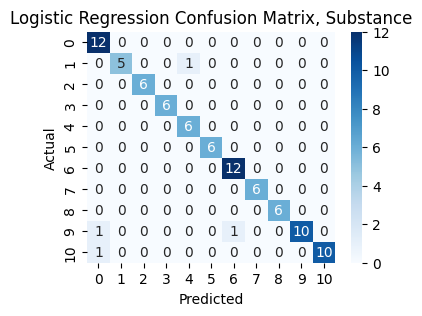

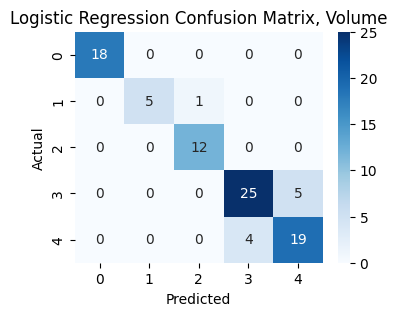

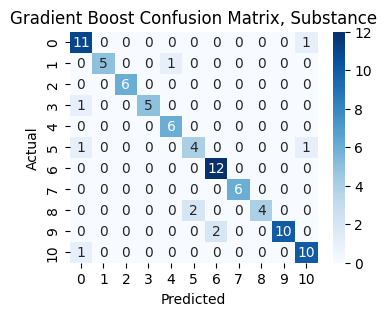

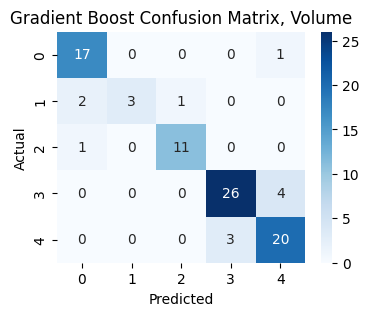

In [5]:
x = df.drop(columns=['volume', 'substance'])
y = df[['substance', 'volume']]
exact_accuracies, label_accuracies = models.train_multioutput_models(x, y, True, True)

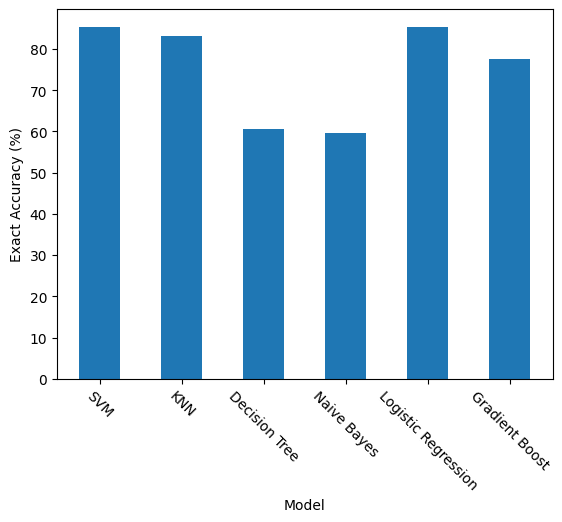

In [6]:
results.plot_accuracy(exact_accuracies)

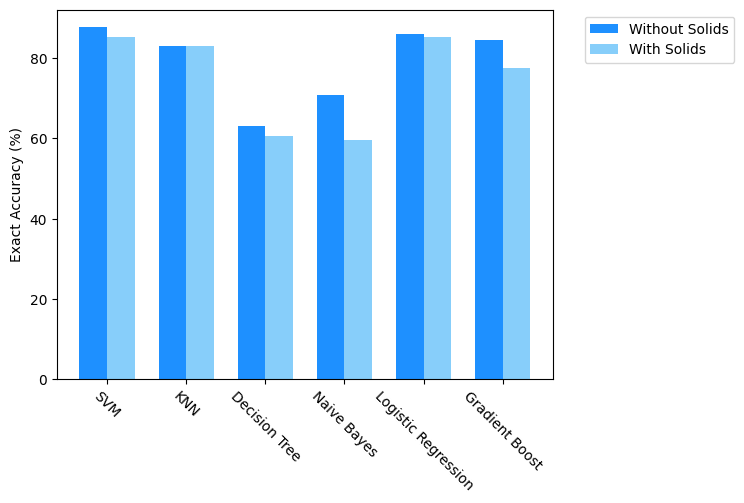

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from src.models import single_models

bandpass_accuracies_df = pd.read_csv('outputs/classification/bandpass_accuracies.csv', header=None)
bandpass_accuracies = bandpass_accuracies_df.iloc[0].tolist()

x = np.arange(len(single_models))  # [0, 1, 2]
width = 0.35  # width of each bar

# Plot bars side by side
plt.bar(x - width/2, bandpass_accuracies, width, label='Without Solids', color='dodgerblue')
plt.bar(x + width/2, exact_accuracies, width, label='With Solids', color='lightskyblue')

# Add labels
model_names = [name for name, _ in single_models]

plt.xticks(x, model_names, rotation=-45)
plt.ylabel('Exact Accuracy (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()